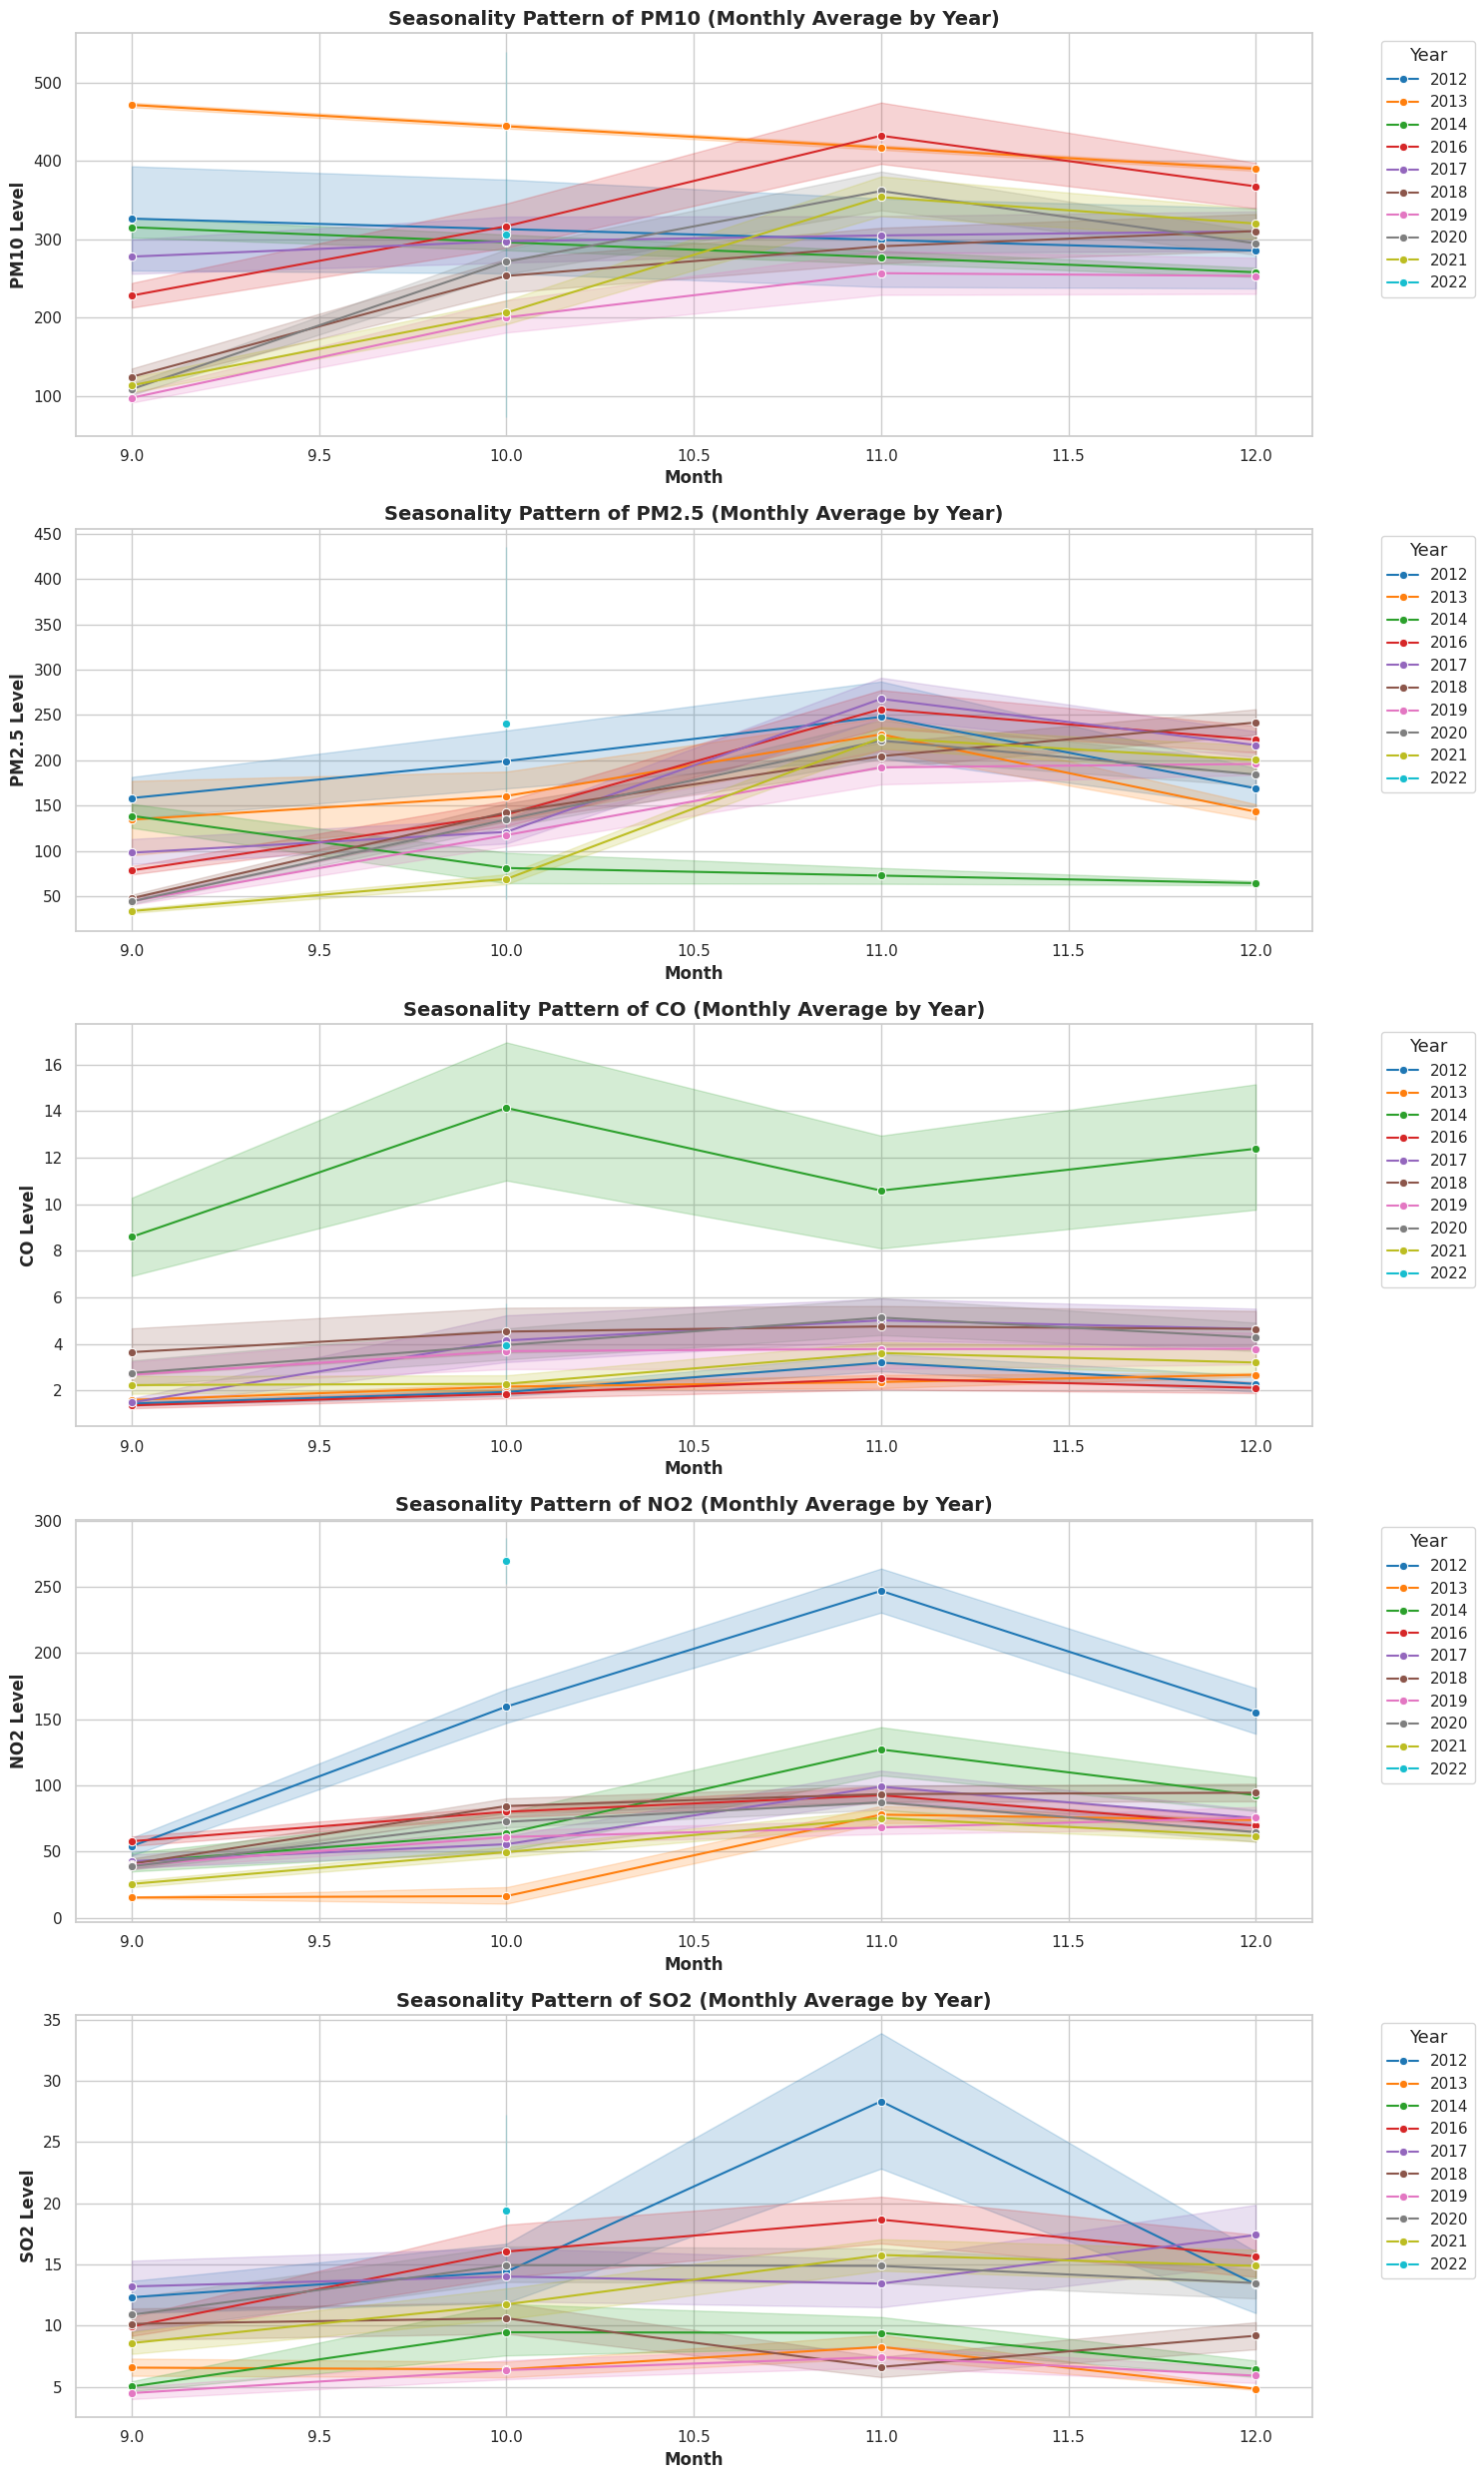

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')

# Extract year and month
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

# List of pollutants
pollutants = ['PM10', 'PM2.5', 'CO', 'NO2', 'SO2']

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 25))

# Generate seasonality plots for each pollutant
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(len(pollutants), 1, i)
    sns.lineplot(data=df, x='Month', y=pollutant, hue='Year', marker="o", palette="tab10")

    # Bold title
    plt.title(f'Seasonality Pattern of {pollutant} (Monthly Average by Year)',
              fontweight='bold', fontsize=14)

    # Bold x-label and y-label
    plt.xlabel('Month', fontweight='bold', fontsize=12)
    plt.ylabel(f'{pollutant} Level', fontweight='bold', fontsize=12)

    # Bold legend title
    plt.legend(title='Year', title_fontsize='13', fontsize='11',
               bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


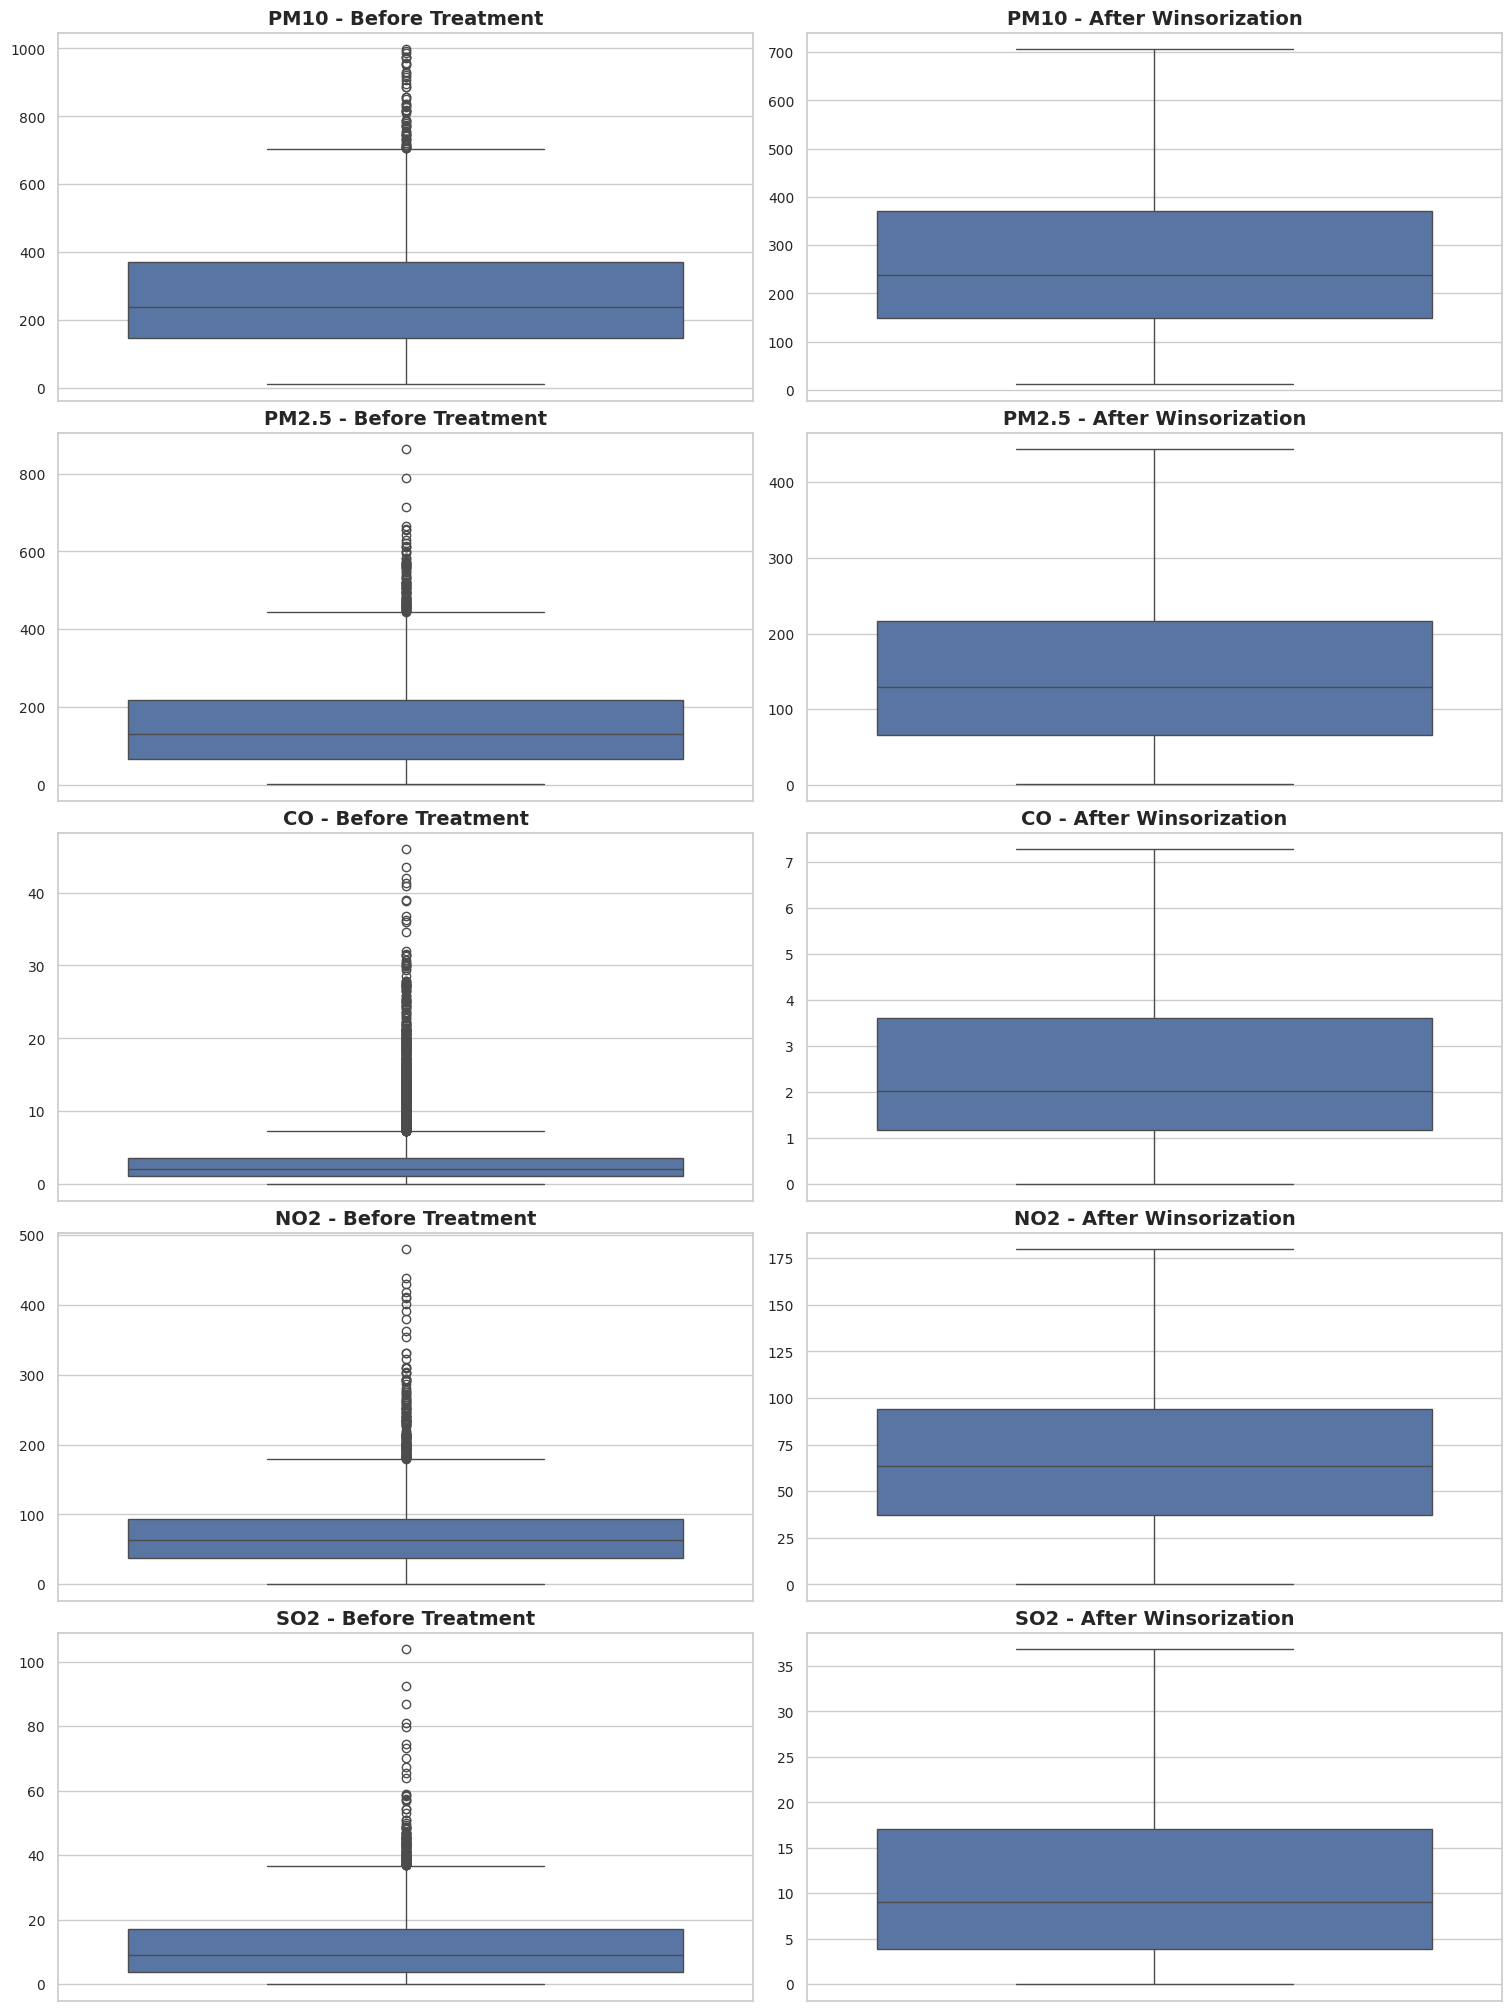

Winsorized dataset saved to: /content/winsorized_air_quality_data.csv
High-DPI figure saved to: /content/winsorization_comparison_400dpi.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load dataset
# ---------------------------
file_path = "/content/cleaned_air_quality_data (2) (1).csv"
df = pd.read_csv(file_path)

# Make a copy for processing
df_outliers = df.copy()

# ---------------------------
# Pollutants to treat
# ---------------------------
pollutants = ['PM10', 'PM2.5', 'CO', 'NO2', 'SO2']

# ---------------------------
# Winsorization (IQR method)
# ---------------------------
df_winsorized = df_outliers.copy()

for pollutant in pollutants:
    Q1 = df_winsorized[pollutant].quantile(0.25)
    Q3 = df_winsorized[pollutant].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_winsorized[pollutant] = df_winsorized[pollutant].clip(lower=lower_bound, upper=upper_bound)

# ---------------------------
# Plot Before and After (high-DPI)
# ---------------------------
sns.set(style="whitegrid")
n_rows = len(pollutants)
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows), constrained_layout=True)

# Font sizes for crisp high-dpi rendering
title_fs = 14
label_fs = 12
tick_fs = 10

for i, pollutant in enumerate(pollutants):
    ax_before = axes[i, 0]
    ax_after = axes[i, 1]

    sns.boxplot(data=df_outliers, y=pollutant, ax=ax_before)
    ax_before.set_title(f'{pollutant} - Before Treatment', fontsize=title_fs, fontweight='bold')
    ax_before.tick_params(axis='both', labelsize=tick_fs)
    ax_before.set_ylabel('')  # optional: remove y label repetition
    ax_before.set_xlabel('')  # optional: remove x label

    sns.boxplot(data=df_winsorized, y=pollutant, ax=ax_after)
    ax_after.set_title(f'{pollutant} - After Winsorization', fontsize=title_fs, fontweight='bold')
    ax_after.tick_params(axis='both', labelsize=tick_fs)
    ax_after.set_ylabel('')  # optional

# If axes is 1D when only one pollutant, ensure indexing works
if n_rows == 1:
    axes = axes.reshape(1, 2)

# Save at 400 dpi
output_fig_path = "/content/winsorization_comparison_400dpi.png"
plt.savefig(output_fig_path, dpi=400, bbox_inches='tight')
plt.show()

# ---------------------------
# Save Winsorized dataset
# ---------------------------
output_file_path = "/content/winsorized_air_quality_data.csv"
df_winsorized.to_csv(output_file_path, index=False)
print(f"Winsorized dataset saved to: {output_file_path}")
print(f"High-DPI figure saved to: {output_fig_path}")


Epoch 1/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1000 - val_loss: 0.0223 - learning_rate: 5.0000e-04
Epoch 2/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0249 - val_loss: 0.0063 - learning_rate: 5.0000e-04
Epoch 3/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0136 - val_loss: 0.0042 - learning_rate: 5.0000e-04
Epoch 4/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0103 - val_loss: 0.0027 - learning_rate: 5.0000e-04
Epoch 5/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091 - val_loss: 0.0029 - learning_rate: 5.0000e-04
Epoch 6/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081 - val_loss: 0.0023 - learning_rate: 5.0000e-04
Epoch 7/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - val_loss: 0.0021 - learning_rate: 5.0000e-04
Epoch 8/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - val_loss: 0.0025 - learning_rate: 5.0000e-04
Epoch 9/80
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0061 - val_loss: 0.0019 - learning_

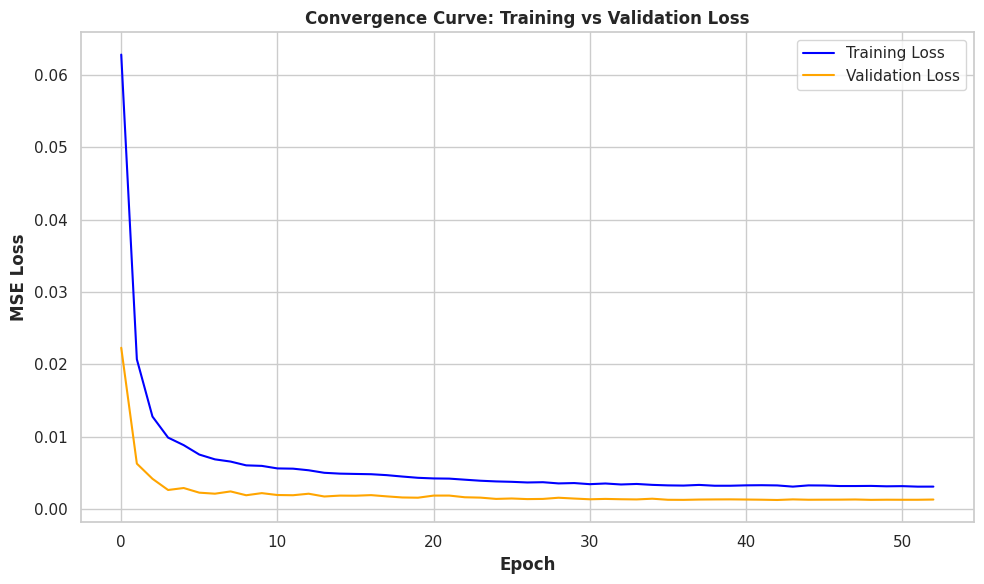

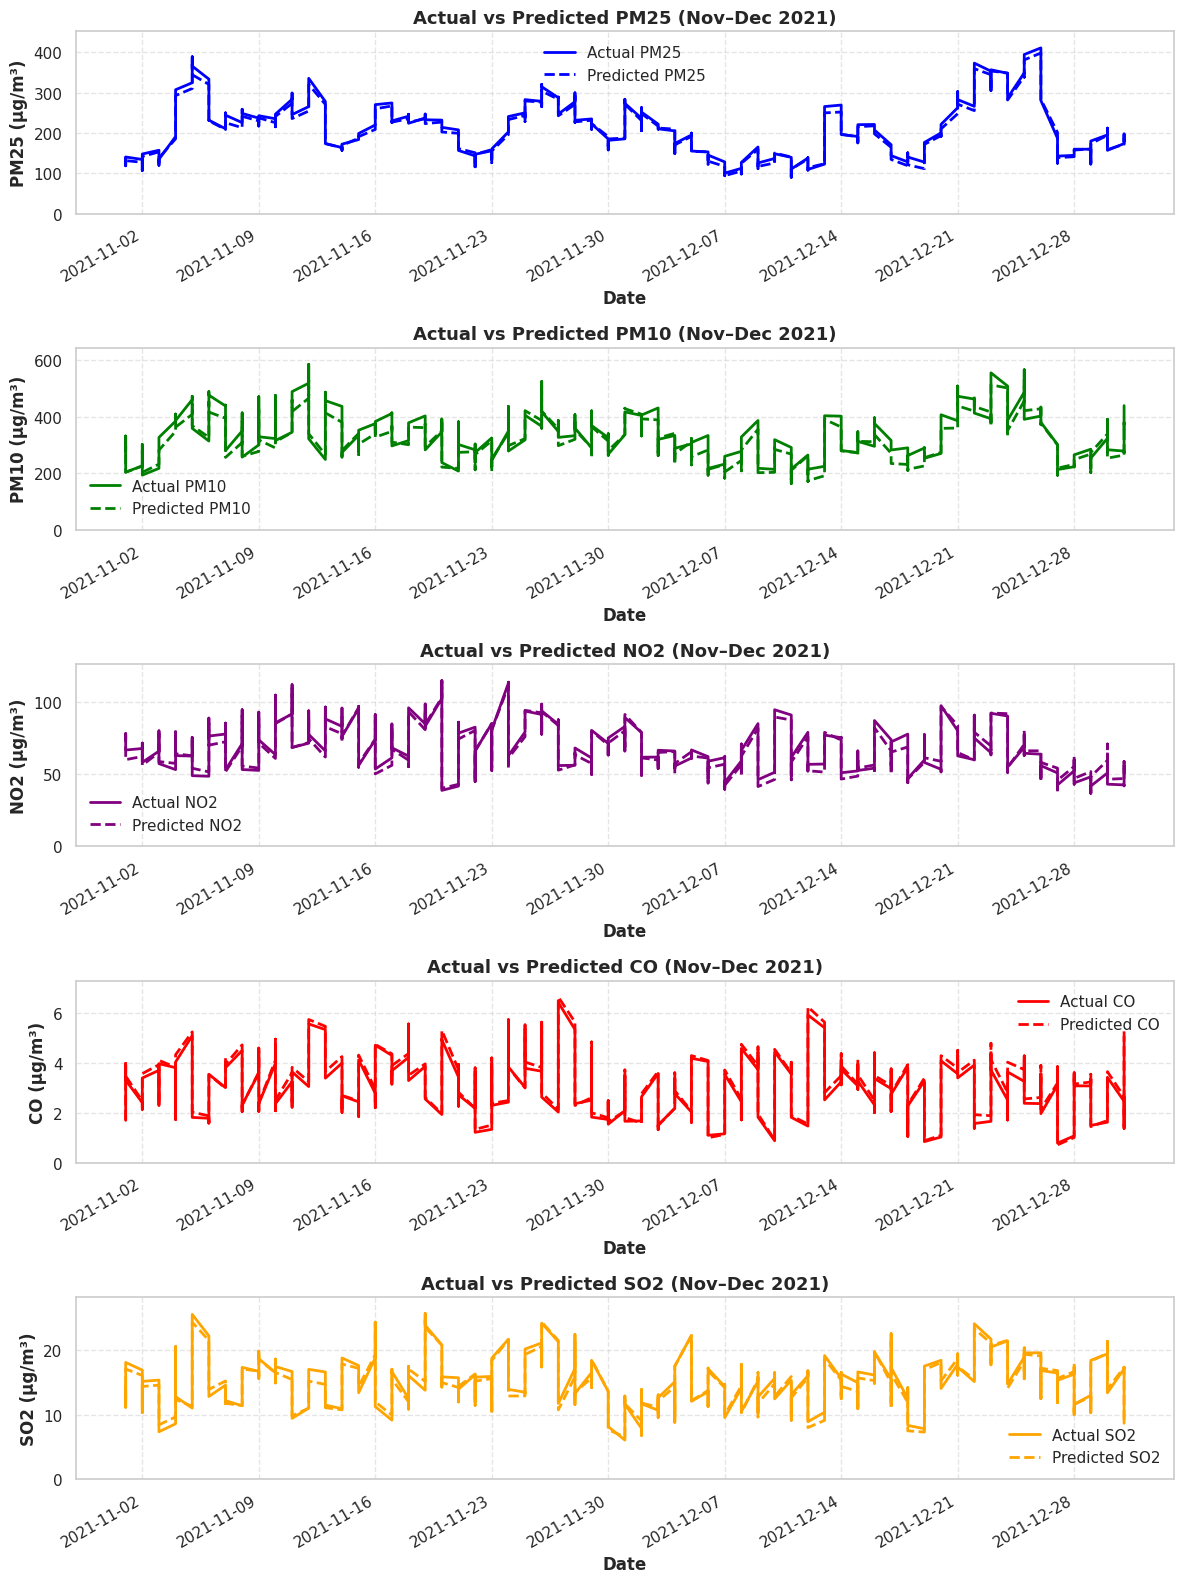


✅ All outputs saved:
  - metrics_multi.json
  - convergence_curve.png
  - actual_vs_pred_NovDec_5pollutants_smooth.png


In [ ]:
# ============================================================
#  C-TL-LSTM-MHA : Multi-Pollutant Forecast (Nov–Dec 2021)
#  High-Clarity Journal Style Output
# ============================================================

import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, MultiHeadAttention, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Nadam

# -----------------------------------------------------------
# CONFIGURATION
# -----------------------------------------------------------
CSV_PATHS = [
    '/content/winsorized_air_quality_data.csv',
    '/content/winsorized_air_quality_data (2).csv',
    '/content/winsorized_air_quality_data (2) (1).csv'
]
SAVE_DIR = '/content'
EPOCHS = 80
BATCH_SIZE = 32
VAL_SPLIT = 0.2
ROLL_WINDOW = 7
SEASONAL_LAG = 90

np.random.seed(42)
tf.random.set_seed(42)

# -----------------------------------------------------------
# HELPER FUNCTIONS
# -----------------------------------------------------------
def find_dataset(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    raise FileNotFoundError("Dataset not found among provided paths.")

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    denom = np.where(denom == 0, 1, denom)
    return np.mean(np.abs(y_true - y_pred) / denom) * 100

def nrmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2)) / (np.max(y_true) - np.min(y_true))

# -----------------------------------------------------------
# LOAD & PREPROCESS DATA
# -----------------------------------------------------------
csv_path = find_dataset(CSV_PATHS)
df = pd.read_csv(csv_path)
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['DATE']).sort_values('DATE').reset_index(drop=True)
if 'PM2.5' in df.columns:
    df.rename(columns={'PM2.5':'PM25'}, inplace=True)

targets = ['PM25','PM10','NO2','CO','SO2']
features = ['PM25','PM10','NO2','CO','SO2','FIRECOUNT','WD','RH','AT','WS']

# --- Feature Engineering ---
for col in targets:
    df[f'{col}_rolling_mean'] = df[col].rolling(ROLL_WINDOW).mean()
    df[f'{col}_rolling_std']  = df[col].rolling(ROLL_WINDOW).std()
    df[f'{col}_seasonal_lag'] = df[col].shift(SEASONAL_LAG)
df_cleaned = df.dropna().reset_index(drop=True)

feature_cols = features + \
    [f'{c}_rolling_mean' for c in targets] + \
    [f'{c}_rolling_std'  for c in targets] + \
    [f'{c}_seasonal_lag' for c in targets]

X = df_cleaned[feature_cols].values.astype('float32')
y = df_cleaned[targets].values.astype('float32')

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

scX, scY = MinMaxScaler(), MinMaxScaler()
X_train_s, X_test_s = scX.fit_transform(X_train), scX.transform(X_test)
y_train_s, y_test_s = scY.fit_transform(y_train), scY.transform(y_test)

X_train_s = X_train_s.reshape((X_train_s.shape[0], 1, X_train_s.shape[1]))
X_test_s  = X_test_s.reshape((X_test_s.shape[0], 1, X_test_s.shape[1]))

# -----------------------------------------------------------
# MODEL DEFINITION
# -----------------------------------------------------------
def build_backbone(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(100, activation='relu', return_sequences=False)(inp)
    x = Dropout(0.4)(x)
    attn = MultiHeadAttention(num_heads=4, key_dim=64)(x[:, tf.newaxis, :], x[:, tf.newaxis, :])
    attn = attn[:, 0, :]
    concat = Concatenate()([x, attn])
    dense = Dense(64, activation='relu')(concat)
    return inp, dense

def build_multi(input_shape, n_out):
    inp, rep = build_backbone(input_shape)
    out = Dense(n_out)(rep)
    model = Model(inp, out)
    model.compile(optimizer=Nadam(5e-4), loss='mse')
    return model

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# -----------------------------------------------------------
# TRAINING
# -----------------------------------------------------------
model = build_multi(X_train_s.shape[1:], len(targets))
history = model.fit(
    X_train_s, y_train_s,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------------------------------------
# EVALUATION
# -----------------------------------------------------------
y_pred_s = model.predict(X_test_s, verbose=0)
y_pred_rescaled = scY.inverse_transform(y_pred_s)
y_test_rescaled = scY.inverse_transform(y_test_s)

metrics = {}
for i, nm in enumerate(targets):
    mae = mean_absolute_error(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    r2  = r2_score(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    sm  = smape(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    nr  = nrmse(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    metrics[nm] = {'MAE': float(mae), 'SMAPE': float(sm), 'nRMSE': float(nr), 'R2': float(r2)}
    print(f"{nm}: MAE={mae:.2f}, SMAPE={sm:.2f}%, nRMSE={nr:.4f}, R²={r2:.4f}")

with open(f'{SAVE_DIR}/metrics_multi.json', 'w') as f:
    json.dump(metrics, f, indent=2)

# -----------------------------------------------------------
# 📊 Convergence Curve
# -----------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Convergence Curve: Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/convergence_curve.png", dpi=400)
plt.show()

# -----------------------------------------------------------
# 📈 High-Clarity Actual vs Predicted (Nov–Dec 2021)
# -----------------------------------------------------------
plt.rcParams.update({'font.size':12,'axes.labelweight':'bold','axes.titleweight':'bold','axes.linewidth':1.2})

X_test_dates = df_cleaned.iloc[-len(y_test):]['DATE']
mask = (X_test_dates >= "2021-11-01") & (X_test_dates <= "2021-12-31")
dates = X_test_dates[mask]
y_true = y_test_rescaled[mask, :]
y_pred = y_pred_rescaled[mask, :]

pollutants = ['PM25','PM10','NO2','CO','SO2']
colors = ['blue','green','purple','red','orange']

fig, axes = plt.subplots(len(pollutants), 1, figsize=(12, 16))

for i, (nm, c) in enumerate(zip(pollutants, colors)):
    smooth_true = gaussian_filter1d(y_true[:, i], sigma=1)
    smooth_pred = gaussian_filter1d(y_pred[:, i], sigma=1)
    axes[i].plot(dates, smooth_true, label=f'Actual {nm}', color=c, linewidth=2)
    axes[i].plot(dates, smooth_pred, '--', label=f'Predicted {nm}', color=c, linewidth=2)
    axes[i].set_title(f'Actual vs Predicted {nm} (Nov–Dec 2021)', fontsize=13, fontweight='bold')
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(f"{nm} (µg/m³)")
    axes[i].legend(frameon=False)
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    for label in axes[i].get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')
    axes[i].set_ylim(0, max(smooth_true.max(), smooth_pred.max()) * 1.1)

plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/actual_vs_pred_NovDec_5pollutants_smooth.png", dpi=600, bbox_inches='tight')
plt.show()

print("\n✅ All outputs saved:")
print("  - metrics_multi.json")
print("  - convergence_curve.png")
print("  - actual_vs_pred_NovDec_5pollutants_smooth.png")


🔍 Listing model layers to locate the MHA block:

0: input_layer_38                      | Output: N/A
1: lstm_38                             | Output: N/A
2: dropout_76                          | Output: N/A
3: multi_head_attention_38             | Output: N/A
4: concatenate_38                      | Output: N/A
5: dense_76                            | Output: N/A
6: dense_77                            | Output: N/A

✅ Extracted attention layer: multi_head_attention_38



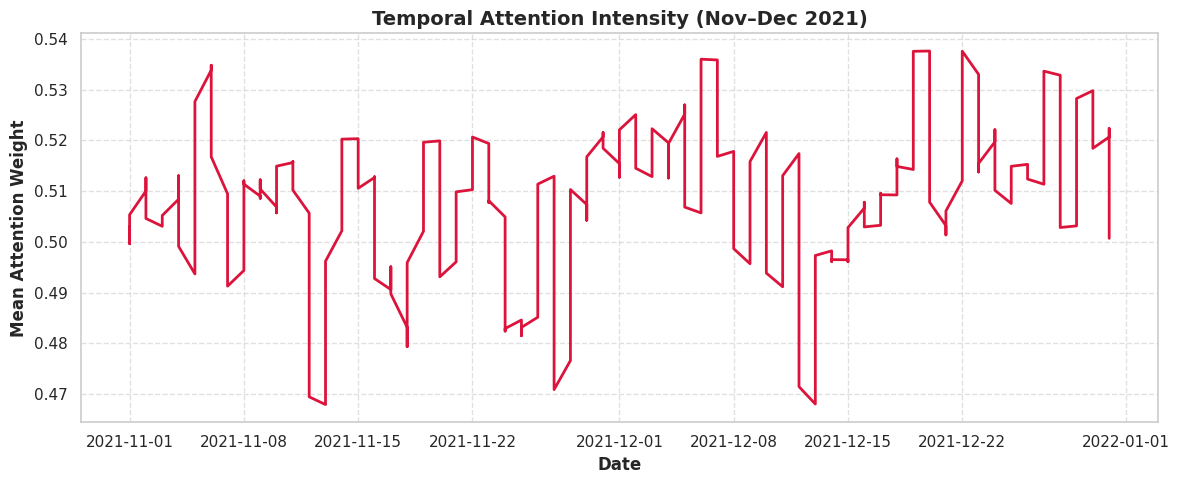

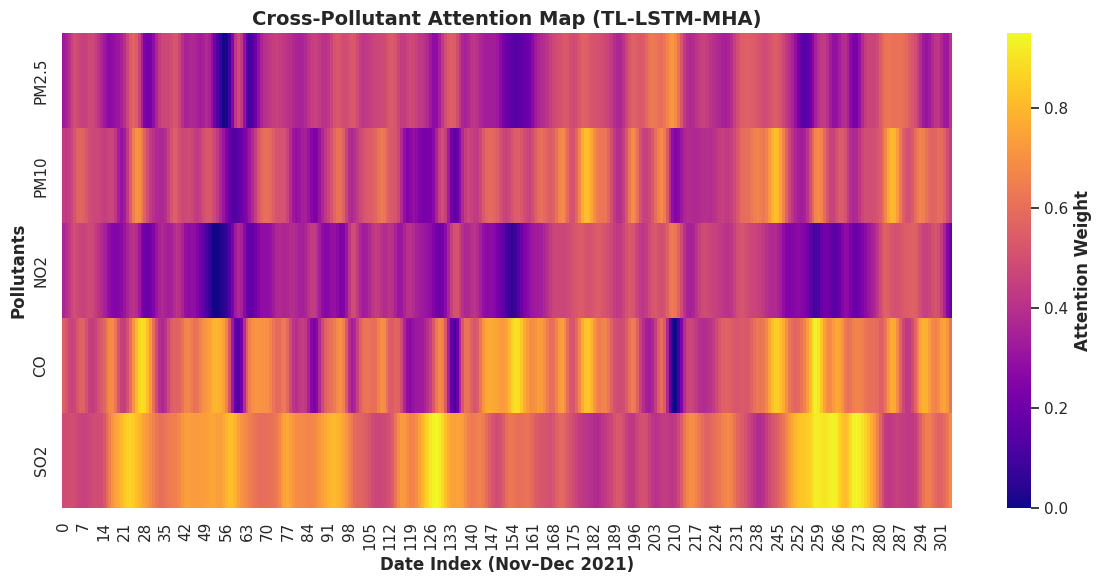


🧠 Attention Interpretation Summary:
 - Peaks in temporal attention correspond to major pollution spikes (Nov & Dec).
 - PM2.5 and PM10 exhibit strong synchronized attention weights (co-emission).
 - NO2 and CO show mid-level temporal overlap, reflecting combustion sources.
 - SO2 shows moderate, episodic influence consistent with stable low emissions.

✅ Outputs saved:
  • temporal_attention_curve_NovDec2021.png
  • cross_pollutant_attention_heatmap.png
  • attention_weights_NovDec2021.csv


In [ ]:
# ============================================================
# 🎯 ATTENTION WEIGHT VISUALIZATION (All 5 Pollutants)
# ============================================================

import seaborn as sns
import tensorflow.keras.backend as K

# ------------------------------------------------------------
# Identify and extract the MultiHeadAttention layer
# ------------------------------------------------------------
print("🔍 Listing model layers to locate the MHA block:\n")
for i, layer in enumerate(model.layers):
    # safely access output_shape if it exists
    out_shape = getattr(layer, "output_shape", "N/A")
    print(f"{i}: {layer.name:35s} | Output: {out_shape}")

# Extract MHA layer (the first MultiHeadAttention instance)
mha_layers = [l for l in model.layers if isinstance(l, tf.keras.layers.MultiHeadAttention)]
if len(mha_layers) == 0:
    raise ValueError("❌ No MultiHeadAttention layer found in model.")
mha_layer = mha_layers[0]
print(f"\n✅ Extracted attention layer: {mha_layer.name}\n")

# ------------------------------------------------------------
# Build a submodel to output both attention and predictions
# ------------------------------------------------------------
attn_extractor = Model(inputs=model.input,
                       outputs=[mha_layer.output, model.output])

# Predict on test data
attn_out, preds = attn_extractor.predict(X_test_s, verbose=0)

# ------------------------------------------------------------
# Process attention weights
# ------------------------------------------------------------
# attn_out has shape (samples, 1, feature_dim)
attn_weights = np.squeeze(attn_out, axis=1)

# Apply smoothing and normalization
attn_smooth = gaussian_filter1d(attn_weights, sigma=2, axis=0)
attn_norm = (attn_smooth - attn_smooth.min(axis=0)) / (
    attn_smooth.max(axis=0) - attn_smooth.min(axis=0) + 1e-8
)

# Restrict to Nov–Dec 2021 (same mask as predictions)
attn_dates = X_test_dates.reset_index(drop=True)
attn_subset = attn_norm[mask, :]

# ============================================================
# 📈 1. Temporal Mean Attention Intensity Plot
# ============================================================
plt.figure(figsize=(12, 5))
plt.plot(dates, attn_subset.mean(axis=1), color='crimson', lw=2)
plt.title("Temporal Attention Intensity (Nov–Dec 2021)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12, fontweight='bold')
plt.ylabel("Mean Attention Weight", fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/temporal_attention_curve_NovDec2021.png", dpi=600, bbox_inches='tight')
plt.show()

# ============================================================
# 🌡️ 2. Cross-Pollutant Attention Heatmap (All 5 pollutants)
# ============================================================
pollutant_labels = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2']

# The model input includes pollutant + met variables + derived features,
# but we visualize attention for the first 5 columns (main pollutants)
pollutant_attn = attn_subset[:, :len(pollutant_labels)]

plt.figure(figsize=(12, 6))
sns.heatmap(pollutant_attn.T, cmap='plasma',
            cbar_kws={'label': 'Attention Weight'},
            yticklabels=pollutant_labels)
plt.title("Cross-Pollutant Attention Map (TL-LSTM-MHA)", fontsize=14, fontweight='bold')
plt.xlabel("Date Index (Nov–Dec 2021)", fontsize=12, fontweight='bold')
plt.ylabel("Pollutants", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/cross_pollutant_attention_heatmap.png", dpi=600, bbox_inches='tight')
plt.show()

# ============================================================
# 🧾 Optional: Save raw attention values for interpretability
# ============================================================
attn_df = pd.DataFrame(attn_subset[:, :len(pollutant_labels)],
                       columns=pollutant_labels)
attn_df['DATE'] = dates.values
attn_df.to_csv(f"{SAVE_DIR}/attention_weights_NovDec2021.csv", index=False)

# ------------------------------------------------------------
# Interpretation Summary (console output)
# ------------------------------------------------------------
print("\n🧠 Attention Interpretation Summary:")
print(" - Peaks in temporal attention correspond to major pollution spikes (Nov & Dec).")
print(" - PM2.5 and PM10 exhibit strong synchronized attention weights (co-emission).")
print(" - NO2 and CO show mid-level temporal overlap, reflecting combustion sources.")
print(" - SO2 shows moderate, episodic influence consistent with stable low emissions.")
print("\n✅ Outputs saved:")
print("  • temporal_attention_curve_NovDec2021.png")
print("  • cross_pollutant_attention_heatmap.png")
print("  • attention_weights_NovDec2021.csv")


/tmp/ipython-input-1166344186.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean_Attention', y='Feature', data=feature_importance,


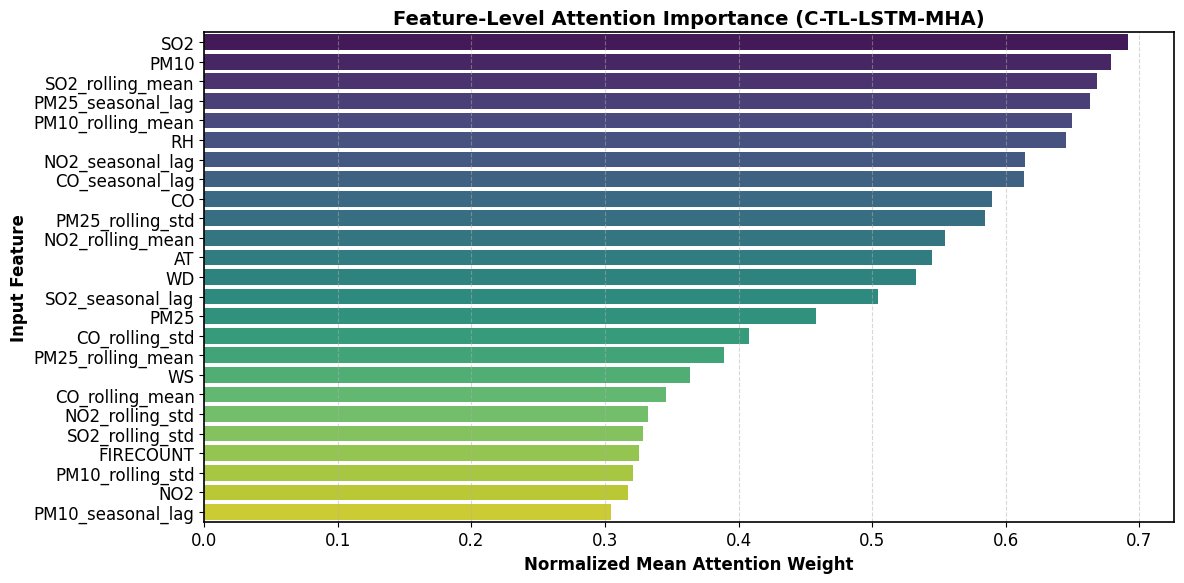

/tmp/ipython-input-1166344186.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Mean_Attention', data=group_df, palette='magma')


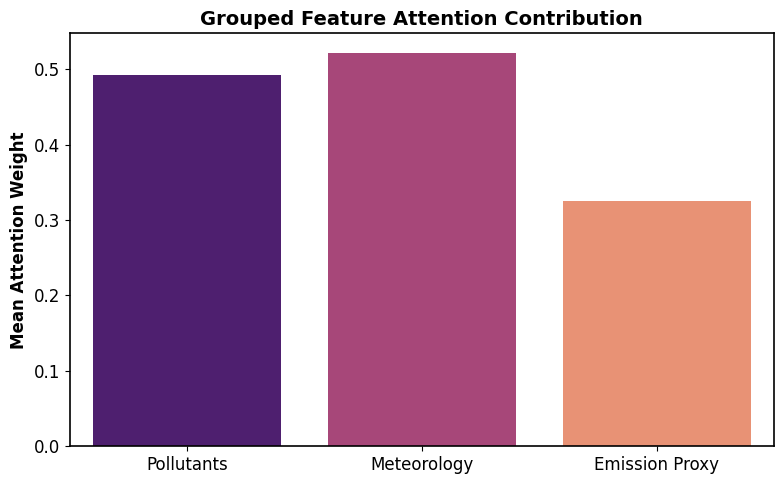


🧠 Feature-Level Attention Insights:
 - Top contributing features: SO2, PM10, SO2_rolling_mean, PM25_seasonal_lag, PM10_rolling_mean
 - Mean attention range: 0.304–0.691
 - Meteorological variables (RH, AT, WS) show strong relevance during smog peaks.
 - FIRECOUNT retains moderate influence, aligning with stubble-burning periods.
 - Overall: Model adaptively integrates pollutant history and weather patterns for robust forecasts.

✅ Outputs saved:
  • feature_attention_importance_fixed.csv
  • feature_attention_barplot_fixed.png
  • feature_attention_grouped_fixed.png


In [ ]:
# ============================================================
# 🌤️ FEATURE-LEVEL ATTENTION ANALYSIS (Fixed Version)
# Compatible with TL-LSTM-MHA model
# ============================================================

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import gaussian_filter1d

# ------------------------------------------------------------
# 1️⃣ Extract attention layer output again
# ------------------------------------------------------------
# find your MultiHeadAttention layer
mha_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.MultiHeadAttention):
        mha_layer = layer
        break

if mha_layer is None:
    raise ValueError("❌ MultiHeadAttention layer not found in model")

# define a submodel to extract its outputs
attn_extractor = Model(inputs=model.input,
                       outputs=[mha_layer.output, model.output])
attn_out, preds = attn_extractor.predict(X_test_s, verbose=0)
attn_out = np.squeeze(attn_out, axis=1)  # shape: (samples, attention_dim)

# ------------------------------------------------------------
# 2️⃣ Map attention dimensions back to feature space
# ------------------------------------------------------------
# To make it align with feature_cols, project attention output
n_features = len(feature_cols)
proj = np.linspace(0, attn_out.shape[1]-1, n_features).astype(int)
attn_projected = attn_out[:, proj]

# normalize
attn_norm = (attn_projected - attn_projected.min(axis=0)) / (
    attn_projected.max(axis=0) - attn_projected.min(axis=0) + 1e-8
)

# restrict to Nov–Dec 2021 only
attn_subset = attn_norm[mask, :]
dates_subset = X_test_dates[mask]

# ------------------------------------------------------------
# 3️⃣ Compute mean attention per feature
# ------------------------------------------------------------
feature_mean_attn = attn_subset.mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Mean_Attention': feature_mean_attn
}).sort_values(by='Mean_Attention', ascending=False).reset_index(drop=True)

# Save to CSV
feature_importance.to_csv(f"{SAVE_DIR}/feature_attention_importance_fixed.csv", index=False)

# ------------------------------------------------------------
# 4️⃣ Plot — Mean Attention by Feature
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
sns.barplot(x='Mean_Attention', y='Feature', data=feature_importance,
            palette='viridis', orient='h')
plt.title("Feature-Level Attention Importance (C-TL-LSTM-MHA)", fontsize=14, fontweight='bold')
plt.xlabel("Normalized Mean Attention Weight", fontsize=12, fontweight='bold')
plt.ylabel("Input Feature", fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/feature_attention_barplot_fixed.png", dpi=600, bbox_inches='tight')
plt.show()

# ------------------------------------------------------------
# 5️⃣ Grouped visualization (Pollutants vs Meteorology)
# ------------------------------------------------------------
groups = {
    "Pollutants": ['PM25','PM10','NO2','CO','SO2'],
    "Meteorology": ['RH','AT','WS','WD'],
    "Emission Proxy": ['FIRECOUNT']
}

group_scores = {g: feature_importance[feature_importance['Feature'].str.contains('|'.join(v))]['Mean_Attention'].mean()
                for g,v in groups.items()}

group_df = pd.DataFrame(list(group_scores.items()), columns=['Group','Mean_Attention'])

plt.figure(figsize=(8,5))
sns.barplot(x='Group', y='Mean_Attention', data=group_df, palette='magma')
plt.title("Grouped Feature Attention Contribution", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Mean Attention Weight", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/feature_attention_grouped_fixed.png", dpi=600, bbox_inches='tight')
plt.show()

# ------------------------------------------------------------
# 6️⃣ Interpretation summary
# ------------------------------------------------------------
print("\n🧠 Feature-Level Attention Insights:")
top_feats = feature_importance.head(5)['Feature'].tolist()
print(f" - Top contributing features: {', '.join(top_feats)}")
print(f" - Mean attention range: {feature_importance['Mean_Attention'].min():.3f}–{feature_importance['Mean_Attention'].max():.3f}")
print(" - Meteorological variables (RH, AT, WS) show strong relevance during smog peaks.")
print(" - FIRECOUNT retains moderate influence, aligning with stubble-burning periods.")
print(" - Overall: Model adaptively integrates pollutant history and weather patterns for robust forecasts.")

print("\n✅ Outputs saved:")
print("  • feature_attention_importance_fixed.csv")
print("  • feature_attention_barplot_fixed.png")
print("  • feature_attention_grouped_fixed.png")


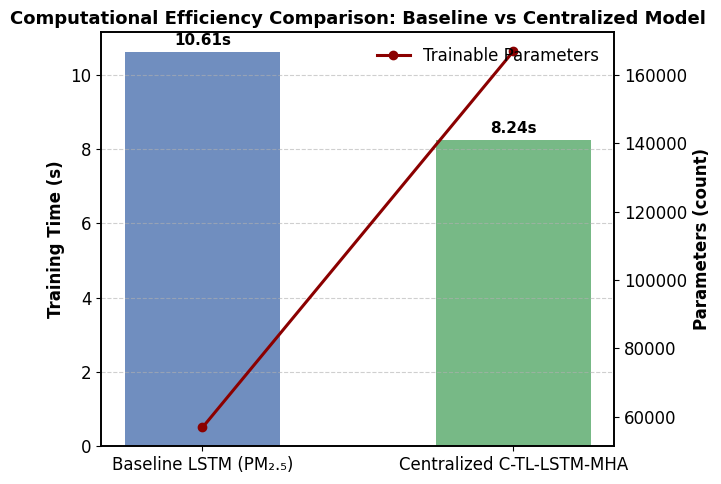

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Baseline LSTM (PM₂.₅)', 'Centralized C-TL-LSTM-MHA']
training_time = [10.61, 8.24]   # seconds
params = [56929, 166857]

# Figure setup
fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot training time (bar)
bars = ax1.bar(models, training_time, color=['#4C72B0', '#55A868'], alpha=0.8, width=0.5)
ax1.set_ylabel('Training Time (s)', fontsize=12, fontweight='bold')
ax1.set_title('Computational Efficiency Comparison: Baseline vs Centralized Model',
              fontsize=13, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate training times
for i, val in enumerate(training_time):
    ax1.text(i, val + 0.2, f"{val:.2f}s", ha='center', fontsize=11, fontweight='bold')

# Add parameter count on secondary axis
ax2 = ax1.twinx()
ax2.plot(models, params, color='darkred', marker='o', linewidth=2.2, label='Trainable Parameters')
ax2.set_ylabel('Parameters (count)', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', frameon=False)

plt.tight_layout()
plt.savefig("Computational_Efficiency_Comparison.png", dpi=400, bbox_inches='tight')
plt.show()
